In [1]:
! pip install -r requirements.txt


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: C:\Users\victo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
from cofig import *
import pandas as pd
import mne


In [3]:
data= pd.read_csv(EEG_CSV_PATH)
data.head()

,20.517,20.823,21.292,21.82,21.133,19.696,19.678,19.733,19.008,18.611,...,2.4235.2,2.1271.2,2.3301,1.8786,3.3683.2,5.8996,4.3778.1,4.6173,2.719.1,1.2379.2
0,31.4050,31.3160,31.3920,31.7840,31.5100,30.2530,30.1100,29.3220,28.7750,27.9960,...,4.0408,2.5926,2.4967,3.0422,4.6513,9.0219,6.7845,6.4113,2.6835,0.50076
1,36.8060,37.6910,39.0900,37.1580,39.4840,35.8470,33.9480,35.8380,35.4850,31.9450,...,7.2154,7.4845,6.5191,6.0453,7.8515,8.8138,8.3861,9.0066,5.2541,3.55430
2,25.3780,25.4150,25.6700,25.0190,26.3280,24.8510,23.8160,24.1080,24.3040,22.2850,...,5.8992,6.8851,4.7966,3.6001,4.5928,6.6228,7.8343,8.1072,4.0891,3.09940
3,30.9030,30.8860,31.2920,30.5510,31.6180,29.0820,28.7180,28.8590,27.8270,26.4090,...,10.5680,9.9480,9.0127,9.2510,10.0140,10.1150,9.8699,9.8980,7.0907,5.30540
4,9.0512,8.9512,8.8554,8.8314,8.9995,8.6684,8.3833,8.1739,8.2121,7.4269,...,1.9432,1.5544,1.3384,1.4880,1.7655,2.7481,2.5176,2.3696,1.0423,0.17241


In [4]:
data.shape

(110, 143028)

In [5]:
print(data)

      20.517   20.823   21.292    21.82   21.133   19.696   19.678   19.733  \
0    31.4050  31.3160  31.3920  31.7840  31.5100  30.2530  30.1100  29.3220   
1    36.8060  37.6910  39.0900  37.1580  39.4840  35.8470  33.9480  35.8380   
2    25.3780  25.4150  25.6700  25.0190  26.3280  24.8510  23.8160  24.1080   
3    30.9030  30.8860  31.2920  30.5510  31.6180  29.0820  28.7180  28.8590   
4     9.0512   8.9512   8.8554   8.8314   8.9995   8.6684   8.3833   8.1739   
..       ...      ...      ...      ...      ...      ...      ...      ...   
105  25.3310  26.0130  26.9540  28.3180  26.6840  24.4790  24.6560  24.9700   
106  29.9600  30.3080  30.8870  31.3980  30.5980  28.7760  28.7680  28.6580   
107  28.0910  28.4030  28.9070  29.2490  28.5910  27.4780  27.1970  26.9850   
108  24.7770  24.8120  25.9490  27.2160  28.2310  25.1230  23.8080  23.8500   
109  17.3660  17.5960  18.2620  18.2930  18.7090  17.0100  16.7680  16.2480   

      19.008   18.611  ...  2.4235.2  2.1271.2  2.3

In [10]:
       

events = pd.read_csv(EEG_EVENTS_PATH)


events2 = pd.read_csv(EEG_EVENTS_PATH, index_col=False)

events.head()
# print(events.shape)
# print((events2.iloc[:,1:]).shape)

,type,value,latency,duration,urevent,Unnamed: 5
0,9999,trigger,1988,0,1,NaN
1,type,value,latency,duration,urevent,NaN
2,86,trigger,5288,0,2,NaN
3,type,value,latency,duration,urevent,NaN
4,106,trigger,90563,0,3,NaN


 A channel was defined as a bad electrode when recorded data from that electrode exceeded more than 3 standard deviations from all other electrodes.
 bad electrodes were interpolated using a spherical spline interpolation (Perrin et al., 1989, 1990) ‘eeg_interp.m’.

In [7]:
CHANNELS = os.path.join(ROOT_EEG_PATH, "EEG/preprocessed/csv_format/gp_A00062219009_interpolated_channels.csv")

chan = pd.read_csv(CHANNELS)
chan.head()

,1,50,59,66,101,108,111


In [43]:
video_data = data.iloc[:, 5288:6000]
print(list(video_data.columns))
# times = [float(t) for t in list(video_data.columns)]

# import numpy as np
# print(np.argmin(times), np.argmax(times))
# print(np.min(times), np.max(times))
# print(times[5900:5950])
# times = times[5912:]
# print(np.argmin(times), np.argmax(times))
# print(np.min(times), np.max(times))


['-6.0161', '-5.191', '-5.251', '-4.6453', '-4.5617', '-4.5287', '-4.2338', '-3.6288', '-3.2331', '-3.7347', '-3.2293', '-3.7305', '-5.3762', '-4.0488', '-4.081', '-3.8533', '-2.8094', '-3.7194', '-4.2174', '-3.8531', '-2.9794', '-2.4745', '-1.8533', '-1.0508', '-2.5165', '-3.2453', '-3.1712', '-1.8839', '-1.5629', '-0.7148', '-1.0892', '-2.3062', '-2.9093', '-3.9736', '-2.7947', '-2.5708', '-4.2331', '-3.7531', '-3.7524', '-3.1526', '-3.0092', '-3.5235', '-2.1232', '-0.35568', '-0.27636', '0.039848', '0.57588', '-0.99563', '-0.80161', '-0.48471', '-0.96708', '-0.49166', '0.91743', '0.85608', '0.60971', '0.30998', '0.4559', '2.2947', '2.6602', '1.4757', '1.3795', '0.8128', '2.5724', '2.9054', '1.8109', '1.9397', '0.48355', '-0.18061', '0.13958', '0.65007', '1.6176', '1.0307', '0.72624', '0.6561', '-0.58024', '0.43222', '2.211', '0.34915', '-0.1163', '0.30813', '-0.31857', '-1.3349', '-1.2497', '-0.62965', '-1.159.1', '-1.2881', '-0.56719', '-1.2705', '-1.8406', '-1.4855', '-0.4057', '1

In [44]:
print(chan.shape)
chan_sign = video_data.iloc[1:, :].to_numpy()
print(chan_sign)

(0, 7)
[[-16.269   -15.45    -14.682   ...  -3.28     -4.473    -4.8066 ]
 [ -4.9479   -5.0623   -4.6269  ...  -2.4724   -3.7182   -3.5343 ]
 [-15.161   -15.581   -14.27    ...   1.7128    0.74555   0.72688]
 ...
 [ -7.9145   -7.8164   -7.1255  ...  -5.0214   -5.1057   -5.0221 ]
 [ -6.2047   -5.2982   -4.6957  ...  -0.42443  -1.3355   -0.63334]
 [ -9.841    -9.4373   -9.2829  ...  -1.9795   -3.1851   -3.3219 ]]


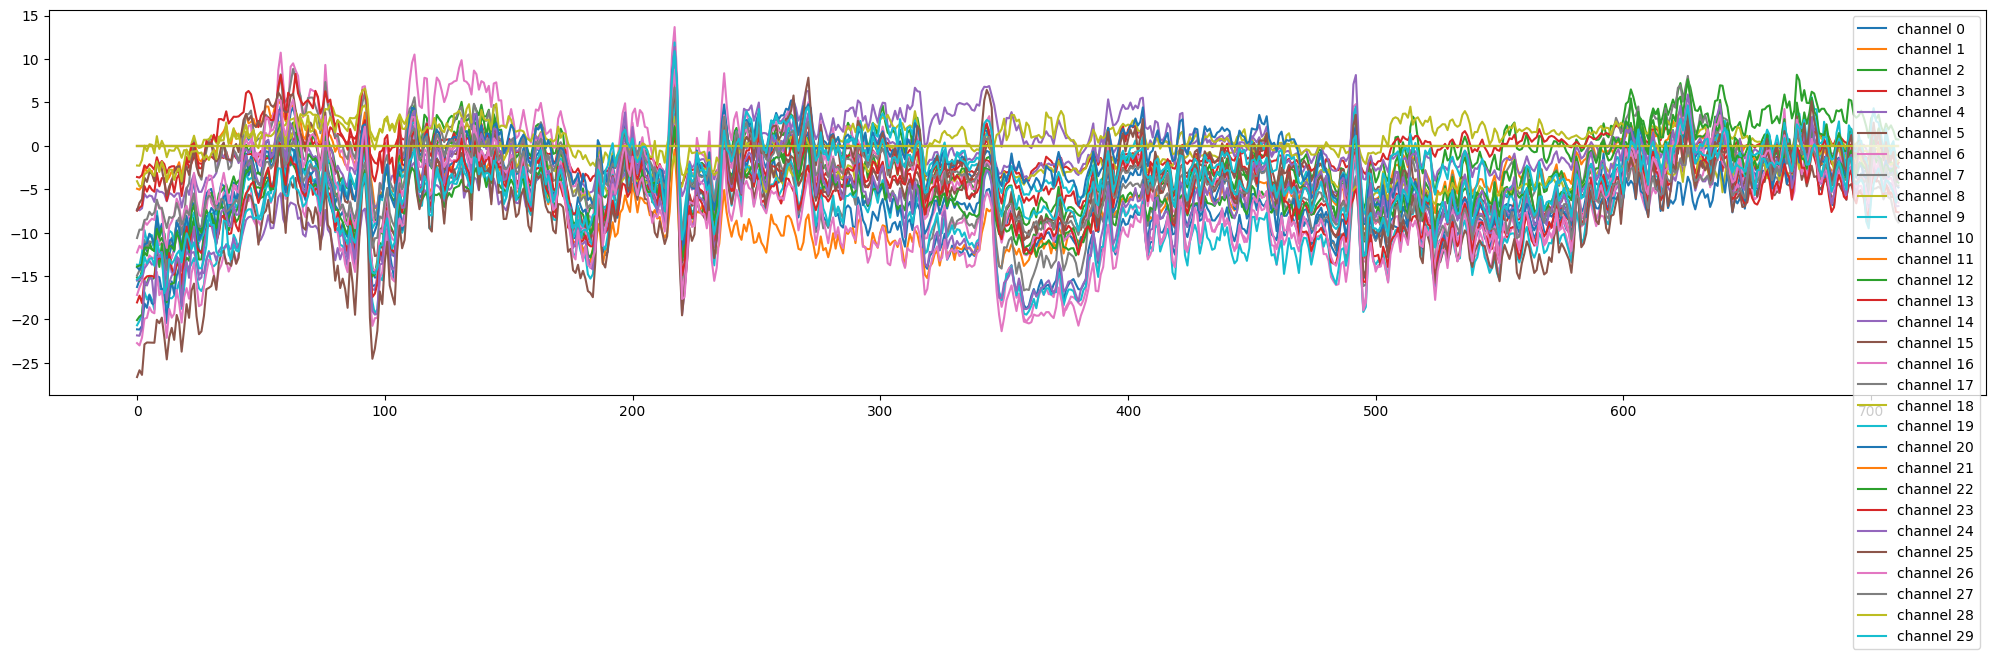

In [49]:
import matplotlib.pyplot as plt
import numpy as np

chan_sign = video_data.iloc[1:, :].to_numpy()

plt.figure(figsize=(25, 5))
for i in range(30):
    plt.plot(range(0, chan_sign.shape[1]), chan_sign[i, :], label=f"channel {i}")
    plt.legend()
plt.show()

In [50]:
correls = video_data.corr()
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correls, annot=True)
plt.show()